## Import Modules

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Reading Datasets

In [78]:
movies = pd.read_csv('/content/drive/MyDrive/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/ratings.csv')
print("Name : Labh Khatke")
print("Enrol : 0901IT201031")


Name : Labh Khatke
Enrol : 0901IT201031


In [79]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [80]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [81]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [82]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [83]:
print(movies.shape)
print(ratings.shape)

(10329, 3)
(105339, 4)


## Data Proprocessing

In [84]:
print(movies.isnull().sum())
print(ratings.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [85]:
df=pd.merge(ratings,movies,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


In [86]:
grouping = df.groupby('title')['rating']
grouping.mean().sort_values(ascending = False).head()

title
Saddest Music in the World, The (2003)    5.0
Interstate 60 (2002)                      5.0
Gunfighter, The (1950)                    5.0
Heima (2007)                              5.0
Limelight (1952)                          5.0
Name: rating, dtype: float64

In [87]:
grouping.count().sort_values(ascending = False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

In [88]:
rattle=pd.DataFrame(grouping.mean())
rattle.head()

,rating
title,
'71 (2014),3.500
'Hellboy': The Seeds of Creation (2004),3.000
'Round Midnight (1986),2.500
'Til There Was You (1997),4.000
"'burbs, The (1989)",3.125


In [89]:
rattle['No.ofRatings'] = pd.DataFrame(df.groupby('title')['rating'].count())
rattle.head()

,rating,No.ofRatings
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


## Visualization

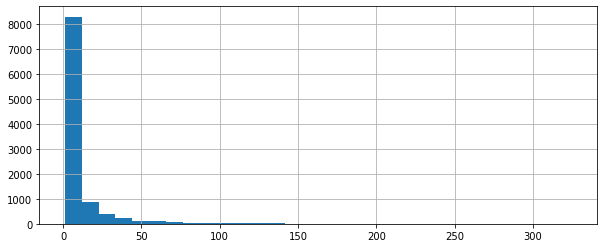

In [90]:
plt.figure(figsize=(10,4))
rattle['No.ofRatings'].hist(bins=30)

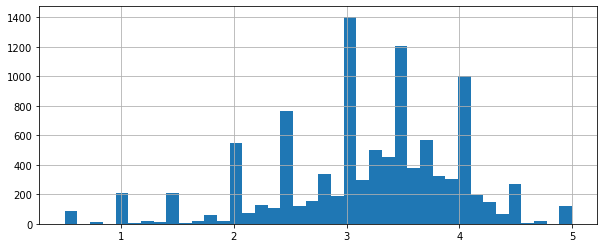

In [91]:
plt.figure(figsize=(10,4))
rattle['rating'].hist(bins=40)

In [124]:
pivouser = df.pivot_table(index='userId',columns='title',values='rating')
pivouser

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN


In [93]:
rattle.sort_values('No.ofRatings',ascending=False).head(10)

,rating,No.ofRatings
title,,
Pulp Fiction (1994),4.160000,325
Forrest Gump (1994),4.138264,311
"Shawshank Redemption, The (1994)",4.454545,308
Jurassic Park (1993),3.659864,294
"Silence of the Lambs, The (1991)",4.194828,290
Star Wars: Episode IV - A New Hope (1977),4.188645,273
"Matrix, The (1999)",4.264368,261
Terminator 2: Judgment Day (1991),3.960474,253
Braveheart (1995),4.108871,248


In [94]:
forrest_ratings = pivouser['Forrest Gump (1994)']
b_ratings = pivouser['Terminator 2: Judgment Day (1991)']
b_ratings.head()

userId
1    3.5
2    NaN
3    3.0
4    NaN
5    NaN
Name: Terminator 2: Judgment Day (1991), dtype: float64

In [95]:
similartoforrestgump = pivouser.corrwith(forrest_ratings)
similartob = pivouser.corrwith(b_ratings)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [105]:
Correlation_Forrest = pd.DataFrame(similartoforrestgump,columns=['Correlation'])
Correlation_Forrest.dropna(inplace=True)
Correlation_Forrest.sort_values('Correlation',ascending=False).head()

,Correlation
title,
Martian Child (2007),1.0
Save the Tiger (1973),1.0
Underworld (1996),1.0
Shortbus (2006),1.0
"Court Jester, The (1956)",1.0


In [106]:
Cf=Correlation_Forrest.join(rattle['No.ofRatings'])
Cf[Cf['No.ofRatings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,No.ofRatings
title,,
Forrest Gump (1994),1.000000,311
"Shawshank Redemption, The (1994)",0.471145,308
Ghost (1990),0.462485,142
Gladiator (2000),0.459022,164
Saving Private Ryan (1998),0.442789,187


In [120]:
Correlation_B = pd.DataFrame(similartob,columns=['Correlation1'])
Correlation_B.dropna(inplace=True)
Correlation_B

,Correlation1
title,
'Til There Was You (1997),1.000000
"'burbs, The (1989)",0.678137
(500) Days of Summer (2009),-0.059055
*batteries not included (1987),0.452267
...And Justice for All (1979),0.408248
...,...
[REC]² (2009),0.774597
eXistenZ (1999),0.254773
xXx (2002),0.261459


In [122]:
Correl_B = Correlation_B.join(rattle['No.ofRatings'])

In [123]:
f = Correl_B[Correl_B['No.ofRatings']>100].sort_values('Correlation1',ascending=False)
f.head(10)

,Correlation1,No.ofRatings
title,,
Terminator 2: Judgment Day (1991),1.000000,253
"Terminator, The (1984)",0.609551,164
Casablanca (1942),0.564615,125
Die Hard (1988),0.535240,165
Aliens (1986),0.523009,157
Total Recall (1990),0.501355,107
Ghostbusters (a.k.a. Ghost Busters) (1984),0.491317,139
Beetlejuice (1988),0.478731,107
Jurassic Park (1993),0.459030,294
